<a href="https://colab.research.google.com/github/jaesuun/sjtg_project/blob/main/mission1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 압축풀기

In [41]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import os

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%cd /content/drive/MyDrive/데이터셋
!unzip -qq "/content/drive/MyDrive/데이터셋/kfood_val.zip"

/content/drive/MyDrive/데이터셋
replace val/생선전/Img_102_0283.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [34]:
import os

# 압축 파일이 해제된 폴더 경로
extracted_folder = "/content/drive/MyDrive/데이터셋/val"

# 해당 폴더 내의 파일 수 확인
file_count = len(os.listdir(extracted_folder))

print("압축 해제된 폴더 내의 파일 수:", file_count)


압축 해제된 폴더 내의 파일 수: 42


##갈비구이_val

In [50]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pathlib import Path
from tqdm import tqdm
from time import perf_counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from IPython.display import Markdown, display

In [52]:
dir_ = Path('/content/drive/MyDrive/데이터셋/val')
filepaths = list(dir_.glob(r'**/*.jpg'))
def proc_img(filepath):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # 경로와 라벨 concatenate
    df = pd.concat([filepath, labels], axis=1)

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)

    return df

df = proc_img(filepaths)
df.head

<bound method NDFrame.head of                                                Filepath          Label
0     /content/drive/MyDrive/데이터셋/val/계란국/...       계란국
1     /content/drive/MyDrive/데이터셋/val/생선전...      생선전
2     /content/drive/MyDrive/데이터셋/val/새우볶으...  새우볶음밥
3     /content/drive/MyDrive/데이터셋/val/조개구이/...       조개구이
4     /content/drive/MyDrive/데이터셋/val/무국/Img...          무국
...                                                 ...            ...
4114  /content/drive/MyDrive/데이터셋/val/동그랑ᄄ...    동그랑땡
4115  /content/drive/MyDrive/데이터셋/val/삼겹살...      삼겹살
4116  /content/drive/MyDrive/데이터셋/val/미역국/...       미역국
4117  /content/drive/MyDrive/데이터셋/val/갈비구이...      갈비구이
4118  /content/drive/MyDrive/데이터셋/val/누룽지/I...        누룽지

[4119 rows x 2 columns]>

In [53]:
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

Number of pictures: 4119

Number of different labels: 42

Labels: ['계란국' '생선전' '새우볶음밥' '조개구이' '무국' '동그랑땡'
 '계란말이' '훈제오리' '북엇국' '감자전' '송편' '김치전'
 '닭갈비' '황태구이' '파전' '조기구이' '장어구이' '유부초밥'
 '더덕구이' '김밥' '곱창구이' '호박전' '비빔밥' '불고기'
 '갈치구이' '고등어구이' '삼겹살' '떡국_만두국' '꿀떡'
 '주먹밥' '누룽지' '시래기국' '갈비구이' '김치볶음밥'
 '콩나물국' '떡갈비' '미역국' '알밥' '계란후라이' '잡곡밥'
 '육개장' '경단']


<ipython-input-56-0e25f3b2cc6f>:7: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout(pad=0.5)
<ipython-input-56-0e25f3b2cc6f>:7: UserWarning: Glyph 4456 (\N{HANGUL JUNGSEONG YE}) missing from current font.
  plt.tight_layout(pad=0.5)
<ipython-input-56-0e25f3b2cc6f>:7: UserWarning: Glyph 4357 (\N{HANGUL CHOSEONG RIEUL}) missing from current font.
  plt.tight_layout(pad=0.5)
<ipython-input-56-0e25f3b2cc6f>:7: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout(pad=0.5)
<ipython-input-56-0e25f3b2cc6f>:7: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout(pad=0.5)
<ipython-input-56-0e25f3b2cc6f>:7: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  plt.tight_layout(pad=0.5)
<ipython-input-56-0e25f3b2cc6f>:7: UserWarning: Glyph 4520 (\N{HANGUL JONGSEONG KIYEOK}) missing from current font.
  plt.tight_layout(pad=0.5)
<ipython-i

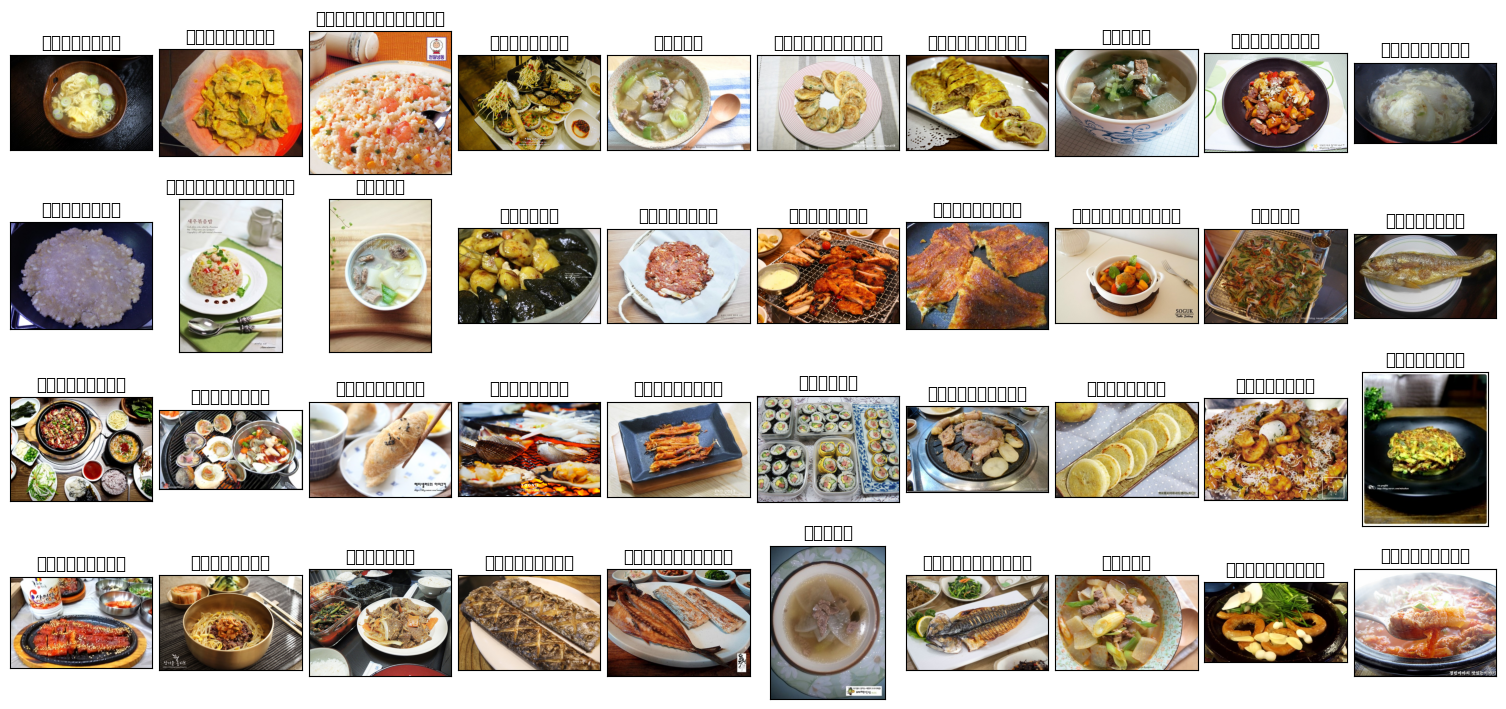

In [56]:
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.Filepath[i]))
    ax.set_title(df.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()